In [1]:
from pathlib import Path

import pandas as pd
from neptoon.quality_control import (
    QualityAssessmentFlagBuilder,
    QualityCheck,
    QATarget,
    QAMethod,
)
from neptoon.corrections import (
    CorrectionType,
    CorrectionTheory,
)
from neptoon.calibration import CalibrationConfiguration
from neptoon.data_audit import (
    DataAuditLog,
)
from neptoon.io.read import (
    ConfigurationManager
)
from neptoon.workflow import ProcessWithYaml

In [2]:
# DataAuditLog.create()

In [3]:
config = ConfigurationManager()
station_config_path = (
    Path.cwd() / "configuration_files" / "FSC001_station.yaml"
)
processing_config_path = (
    Path.cwd() / "configuration_files" / "v1_processing_method.yaml"
)

config.load_configuration(
    file_path=station_config_path,
)
config.load_configuration(
    file_path=processing_config_path,
)

yaml_processor = ProcessWithYaml(configuration_object=config)

## OPTION 1:
data_hub = yaml_processor.create_data_hub()

In [4]:
data_hub.crns_data_frame

,epithermal_neutrons_raw,NeutronCount_Slow_Cum1h,AirTemperature,AirHumidity_Relative,air_pressure,Precipitation,air_temperature,air_relative_humidity,epithermal_neutrons_cph
DateTime_utc,,,,,,,,,
2014-01-09 11:00:00+00:00,655.0,NaN,NaN,NaN,996.2,NaN,8.9,93.9,655.0
2014-01-09 12:00:00+00:00,715.0,431.0,NaN,NaN,994.3,NaN,10.1,84.4,715.0
2014-01-09 13:00:00+00:00,741.0,473.0,NaN,NaN,993.6,NaN,10.6,80.1,741.0
2014-01-09 14:00:00+00:00,713.0,488.0,NaN,NaN,992.6,NaN,11.1,77.1,713.0
2014-01-09 15:00:00+00:00,734.0,506.0,NaN,NaN,991.3,NaN,11.6,75.5,734.0
...,...,...,...,...,...,...,...,...,...
2020-06-09 19:00:00+00:00,1034.0,521.0,NaN,NaN,1010.0,NaN,25.6,41.3,1034.0
2020-06-09 20:00:00+00:00,952.0,524.0,NaN,NaN,1010.2,NaN,23.4,40.6,952.0
2020-06-09 21:00:00+00:00,924.0,473.0,NaN,NaN,1010.4,NaN,21.8,40.6,924.0


In [5]:
calib_df = pd.read_csv(
    Path.cwd() / "example_data" / "FSCD001_calibration.csv"
)
data_hub.calibration_samples_data = calib_df

The `attach_nmdb_data()` method has defaults. Running the below code, without selecting values, will work too. 


```python
data_hub.attach_nmdb_data()
```



In [6]:
data_hub.attach_nmdb_data(
    station = "JUNG",
    new_column_name = "incoming_neutron_intensity",
    resolution = "60",
    nmdb_table = "revori"
    )
data_hub.crns_data_frame

,epithermal_neutrons_raw,NeutronCount_Slow_Cum1h,AirTemperature,AirHumidity_Relative,air_pressure,Precipitation,air_temperature,air_relative_humidity,epithermal_neutrons_cph,incoming_neutron_intensity,reference_incoming_neutron_value
DateTime_utc,,,,,,,,,,,
2014-01-09 11:00:00+00:00,655.0,NaN,NaN,NaN,996.2,NaN,8.9,93.9,655.0,155.777,154.745
2014-01-09 12:00:00+00:00,715.0,431.0,NaN,NaN,994.3,NaN,10.1,84.4,715.0,155.713,154.745
2014-01-09 13:00:00+00:00,741.0,473.0,NaN,NaN,993.6,NaN,10.6,80.1,741.0,156.260,154.745
2014-01-09 14:00:00+00:00,713.0,488.0,NaN,NaN,992.6,NaN,11.1,77.1,713.0,156.291,154.745
2014-01-09 15:00:00+00:00,734.0,506.0,NaN,NaN,991.3,NaN,11.6,75.5,734.0,155.724,154.745
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-09 19:00:00+00:00,1034.0,521.0,NaN,NaN,1010.0,NaN,25.6,41.3,1034.0,168.061,154.745
2020-06-09 20:00:00+00:00,952.0,524.0,NaN,NaN,1010.2,NaN,23.4,40.6,952.0,168.053,154.745
2020-06-09 21:00:00+00:00,924.0,473.0,NaN,NaN,1010.4,NaN,21.8,40.6,924.0,167.782,154.745


In [7]:
data_hub.prepare_static_values()
data_hub.crns_data_frame

,epithermal_neutrons_raw,NeutronCount_Slow_Cum1h,AirTemperature,AirHumidity_Relative,air_pressure,Precipitation,air_temperature,air_relative_humidity,epithermal_neutrons_cph,incoming_neutron_intensity,reference_incoming_neutron_value,name,country,identifier,install_date,latitude,longitude,elevation,time_zone,site_cutoff_rigidity
DateTime_utc,,,,,,,,,,,,,,,,,,,,
2014-01-09 11:00:00+00:00,655.0,NaN,NaN,NaN,996.2,NaN,8.9,93.9,655.0,155.777,154.745,Fuerstensee,Germany,FSC001,2014-01-01,53.319,13.122,66.0,1,2.55
2014-01-09 12:00:00+00:00,715.0,431.0,NaN,NaN,994.3,NaN,10.1,84.4,715.0,155.713,154.745,Fuerstensee,Germany,FSC001,2014-01-01,53.319,13.122,66.0,1,2.55
2014-01-09 13:00:00+00:00,741.0,473.0,NaN,NaN,993.6,NaN,10.6,80.1,741.0,156.260,154.745,Fuerstensee,Germany,FSC001,2014-01-01,53.319,13.122,66.0,1,2.55
2014-01-09 14:00:00+00:00,713.0,488.0,NaN,NaN,992.6,NaN,11.1,77.1,713.0,156.291,154.745,Fuerstensee,Germany,FSC001,2014-01-01,53.319,13.122,66.0,1,2.55
2014-01-09 15:00:00+00:00,734.0,506.0,NaN,NaN,991.3,NaN,11.6,75.5,734.0,155.724,154.745,Fuerstensee,Germany,FSC001,2014-01-01,53.319,13.122,66.0,1,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-09 19:00:00+00:00,1034.0,521.0,NaN,NaN,1010.0,NaN,25.6,41.3,1034.0,168.061,154.745,Fuerstensee,Germany,FSC001,2014-01-01,53.319,13.122,66.0,1,2.55
2020-06-09 20:00:00+00:00,952.0,524.0,NaN,NaN,1010.2,NaN,23.4,40.6,952.0,168.053,154.745,Fuerstensee,Germany,FSC001,2014-01-01,53.319,13.122,66.0,1,2.55
2020-06-09 21:00:00+00:00,924.0,473.0,NaN,NaN,1010.4,NaN,21.8,40.6,924.0,167.782,154.745,Fuerstensee,Germany,FSC001,2014-01-01,53.319,13.122,66.0,1,2.55


You can use your IDE (e.g., in VSCode) to check which methods are available using the 

In [8]:
from neptoon.quality_control import WhatParamsDoINeed

WhatParamsDoINeed(QAMethod.SPIKE_UNILOF)


Required parameters for QAMethod.SPIKE_UNILOF:
--------------------------------------------------

Optional parameters for QAMethod.SPIKE_UNILOF:
--------------------------------------------------
periods_in_calculation - [time steps] (default: 20):
    Number of periods to be included into the LOF calculation
algorithm - [Literal] (default: ball_tree):
    Algorithm used for calculating the n-nearest neighbors needed for LOF calculation.
    ['ball_tree', 'kd_tree', 'brute', 'auto']
threshold - [decimal] (default: 1.5):
    Threshold for flagging

Further information about QAMethod.SPIKE_UNILOF:
--------------------------------------------------
https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagUniLOF


The parameters are optional and uses defaults, I'll stick with these.

In [9]:
qa_flags = QualityAssessmentFlagBuilder()
qa_flags.add_check(
    
    QualityCheck(
        target=QATarget.RELATIVE_HUMIDITY,
        method=QAMethod.RANGE_CHECK,
        parameters={
            "min":0,
            "max":100
                }),

    QualityCheck(
        target=QATarget.RAW_EPI_NEUTRONS,
        method=QAMethod.SPIKE_UNILOF,
    )
)

data_hub.add_quality_flags(custom_flags=qa_flags)
data_hub.apply_quality_flags()
data_hub.flags_data_frame


,epithermal_neutrons_raw,NeutronCount_Slow_Cum1h,AirTemperature,AirHumidity_Relative,air_pressure,Precipitation,air_temperature,air_relative_humidity,epithermal_neutrons_cph,incoming_neutron_intensity,reference_incoming_neutron_value,name,country,identifier,install_date,latitude,longitude,elevation,time_zone,site_cutoff_rigidity
DateTime_utc,,,,,,,,,,,,,,,,,,,,
2014-01-09 11:00:00+00:00,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED
2014-01-09 12:00:00+00:00,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED
2014-01-09 13:00:00+00:00,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED
2014-01-09 14:00:00+00:00,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED
2014-01-09 15:00:00+00:00,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-09 19:00:00+00:00,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED
2020-06-09 20:00:00+00:00,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED
2020-06-09 21:00:00+00:00,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED,UNFLAGGED


In [10]:
data_hub.select_correction(
    correction_type=CorrectionType.INCOMING_INTENSITY,
    correction_theory=CorrectionTheory.ZREDA_2012,
)
data_hub.select_correction(
    correction_type=CorrectionType.HUMIDITY,
    correction_theory=CorrectionTheory.ROSOLEM_2013
)

data_hub.select_correction(
    correction_type=CorrectionType.PRESSURE,
)

# data_hub.select_correction(
#     correction_type=CorrectionType.ABOVE_GROUND_BIOMASS
# )

data_hub.correct_neutrons()
data_hub.crns_data_frame

,epithermal_neutrons_raw,NeutronCount_Slow_Cum1h,AirTemperature,AirHumidity_Relative,air_pressure,Precipitation,air_temperature,air_relative_humidity,epithermal_neutrons_cph,incoming_neutron_intensity,...,actual_vapour_pressure,absolute_humidity,humidity_correction,mean_pressure,beta_coefficient,atmospheric_pressure_correction,corrected_epithermal_neutrons,corrected_epithermal_neutrons_uncertainty,corrected_epithermal_neutrons_upper_count,corrected_epithermal_neutrons_lower_count
DateTime_utc,,,,,,,,,,,,,,,,,,,,,
2014-01-09 11:00:00+00:00,655.0,NaN,NaN,NaN,996.2,NaN,8.9,93.9,655.0,155.777,...,10.701509,8.221427,1.044396,1005.3464,0.007315,0.935287,635.571985,24.833852,660.405837,610.738133
2014-01-09 12:00:00+00:00,715.0,431.0,NaN,NaN,994.3,NaN,10.1,84.4,715.0,155.713,...,10.426863,7.976494,1.043073,1005.3464,0.007315,0.922379,683.631348,25.566363,709.197711,658.064985
2014-01-09 13:00:00+00:00,741.0,473.0,NaN,NaN,993.6,NaN,10.6,80.1,741.0,156.260,...,10.231579,7.813311,1.042192,1005.3464,0.007315,0.917668,701.811505,25.781690,727.593195,676.029815
2014-01-09 14:00:00+00:00,713.0,488.0,NaN,NaN,992.6,NaN,11.1,77.1,713.0,156.291,...,10.181377,7.761298,1.041911,1005.3464,0.007315,0.910981,670.057304,25.093843,695.151148,644.963461
2014-01-09 15:00:00+00:00,734.0,506.0,NaN,NaN,991.3,NaN,11.6,75.5,734.0,155.724,...,10.305865,7.842401,1.042349,1005.3464,0.007315,0.902359,686.040510,25.322217,711.362727,660.718293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-09 19:00:00+00:00,1034.0,521.0,NaN,NaN,1010.0,NaN,25.6,41.3,1034.0,168.061,...,13.557331,9.833193,1.053099,1005.3464,0.007315,1.034625,1037.343013,32.259833,1069.602846,1005.083179
2020-06-09 20:00:00+00:00,952.0,524.0,NaN,NaN,1010.2,NaN,23.4,40.6,952.0,168.053,...,11.681880,8.535778,1.046093,1005.3464,0.007315,1.036139,950.158106,30.794801,980.952907,919.363305
2020-06-09 21:00:00+00:00,924.0,473.0,NaN,NaN,1010.4,NaN,21.8,40.6,924.0,167.782,...,10.599595,7.786982,1.042050,1005.3464,0.007315,1.037656,921.478460,30.314416,951.792875,891.164044


We've pulled some calibration data that doesn't exactly follow the expected naming convention in neptoon. We can change this in the `CalibrationConfiguration` by updating the expected column names for key columns. 

In [11]:
calibration_config = CalibrationConfiguration(
    date_time_column_name='DateTime_utc',
    profile_id_column='Profile_ID',
    distance_column='Distance_to_CRNS_m',
    sample_depth_column='Profile_Depth_cm',
    soil_moisture_gravimetric_column='SoilMoisture_g_g',
    bulk_density_of_sample_column='DryBulkDensity_g_cm3',
    soil_organic_carbon_column='SoilOrganicCarbon_g_g',
    lattice_water_column='LatticeWater_g_g',
)

data_hub.calibrate_station(config=calibration_config)
data_hub.calibrator.return_calibration_results_data_frame()

N0 number was calculated as 1130


,calibration_day,field_average_soil_moisture_volumetric,field_average_soil_moisture_gravimetric,horizontal_footprint_radius_in_meters,optimal_N0,absolute_error
0,2014-01-17 12:00:00+00:00,0.178084,0.17972,139.721328,1049.0,0.000103
1,2014-11-17 12:00:00+00:00,0.143864,0.16831,149.961242,1212.0,0.000114


In [12]:
data_hub.produce_soil_moisture_estimates()
data_hub.crns_data_frame

,epithermal_neutrons_raw,NeutronCount_Slow_Cum1h,AirTemperature,AirHumidity_Relative,air_pressure,Precipitation,air_temperature,air_relative_humidity,epithermal_neutrons_cph,incoming_neutron_intensity,...,beta_coefficient,atmospheric_pressure_correction,corrected_epithermal_neutrons,corrected_epithermal_neutrons_uncertainty,corrected_epithermal_neutrons_upper_count,corrected_epithermal_neutrons_lower_count,soil_moisture,soil_moisture_uncertainty_upper,soil_moisture_uncertainty_lower,crns_measurement_depth
DateTime_utc,,,,,,,,,,,,,,,,,,,,,
2014-01-09 11:00:00+00:00,655.0,NaN,NaN,NaN,996.2,NaN,8.9,93.9,655.0,155.777,...,0.007315,0.935287,635.571985,24.833852,660.405837,610.738133,0.439925,0.518690,0.377470,12.542323
2014-01-09 12:00:00+00:00,715.0,431.0,NaN,NaN,994.3,NaN,10.1,84.4,715.0,155.713,...,0.007315,0.922379,683.631348,25.566363,709.197711,658.064985,0.329730,0.382800,0.286062,14.471789
2014-01-09 13:00:00+00:00,741.0,473.0,NaN,NaN,993.6,NaN,10.6,80.1,741.0,156.260,...,0.007315,0.917668,701.811505,25.781690,727.593195,676.029815,0.297862,0.344400,0.259140,15.262412
2014-01-09 14:00:00+00:00,713.0,488.0,NaN,NaN,992.6,NaN,11.1,77.1,713.0,156.291,...,0.007315,0.910981,670.057304,25.093843,695.151148,644.963461,0.356552,0.414681,0.309047,13.904122
2014-01-09 15:00:00+00:00,734.0,506.0,NaN,NaN,991.3,NaN,11.6,75.5,734.0,155.724,...,0.007315,0.902359,686.040510,25.322217,711.362727,660.718293,0.325256,0.376767,0.282716,14.574524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-09 19:00:00+00:00,1034.0,521.0,NaN,NaN,1010.0,NaN,25.6,41.3,1034.0,168.061,...,0.007315,1.034625,1037.343013,32.259833,1069.602846,1005.083179,0.046995,0.058600,0.036542,41.061504
2020-06-09 20:00:00+00:00,952.0,524.0,NaN,NaN,1010.2,NaN,23.4,40.6,952.0,168.053,...,0.007315,1.036139,950.158106,30.794801,980.952907,919.363305,0.081613,0.096733,0.068155,31.318188
2020-06-09 21:00:00+00:00,924.0,473.0,NaN,NaN,1010.4,NaN,21.8,40.6,924.0,167.782,...,0.007315,1.037656,921.478460,30.314416,951.792875,891.164044,0.095635,0.112314,0.080860,28.757389


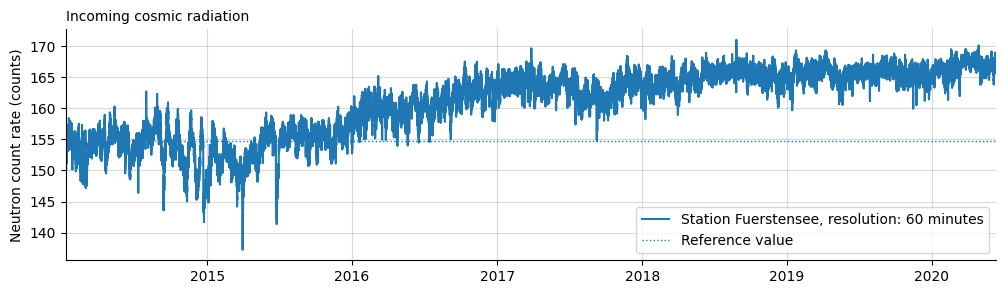

In [13]:
figs = data_hub.create_figures(show_figures=True,selected_figures='nmdb_figure_1')

In [ ]:
data_hub.save_data(append_yaml_hash_to_folder_name=True)